In [1]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
(x_train_data, t_train_data),(x_test_data, t_test_data) = mnist.load_data()

In [3]:
print(x_train_data.shape, t_train_data.shape)
print(x_test_data.shape, t_test_data.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
print(t_train_data[0])

5


<function matplotlib.pyplot.show(close=None, block=None)>

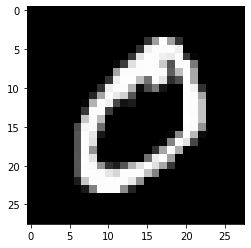

In [5]:
img=x_train_data[1]
plt.imshow(img, cmap='gray')
plt.show

In [6]:
print(x_train_data[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

<function matplotlib.pyplot.show(close=None, block=None)>

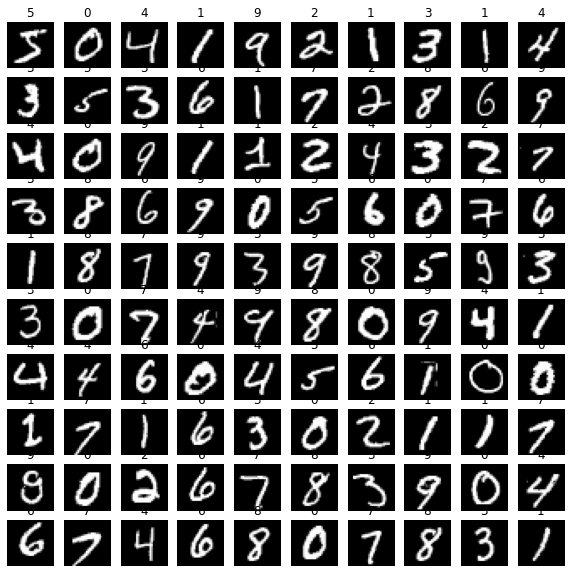

In [7]:
plt.figure(figsize=(10,10))

for index in range(0,100,1):
    plt.subplot(10,10,index+1)
    plt.imshow(x_train_data[index], cmap='gray')
    plt.axis('off')
    plt.title(str(t_train_data[index]))


plt.show

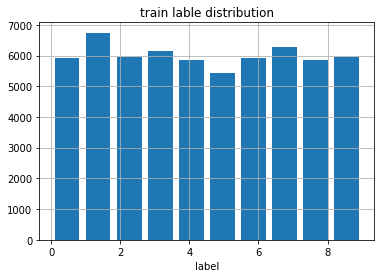

In [8]:
plt.title('train lable distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train_data, bins = 10, rwidth = 0.8)
plt.show()

In [9]:
label_list= np.zeros(10)
print(label_list)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
for idx in range(len(t_train_data)):
    label= int(t_train_data[idx])
    label_list[label] += 1

print(label_list)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [11]:
x_train = (x_train_data - 0.0)/(255.0 -0.0)

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
x_test = (x_test_data - 0.0)/(255.0 -0.0)

print(x_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
t_train_data[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [14]:
# One Hot encoding
t_train = tf.keras.utils.to_categorical(t_train_data, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test_data, num_classes=10)

In [15]:
print(t_train[0])
print(t_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [16]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
# optimizer(최적화) : 최소값
# Adam : 
# loss : 손실함수
# categorical_crossentropy : 응답을 찾을 때 사용 ( wn인코딩?)

# softmax : 전체 합이 1이 되도록 해줌??

model.compile(optimizer=Adam(learning_rate = 1e-4),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist=model.fit(x_train, t_train, epochs = 50, validation_split = 0.3)

Epoch 1/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7849 - accuracy: 0.8061 - val_loss: 0.3971 - val_accuracy: 0.8964
Epoch 2/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3527 - accuracy: 0.9054 - val_loss: 0.3135 - val_accuracy: 0.9133
Epoch 3/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2923 - accuracy: 0.9195 - val_loss: 0.2748 - val_accuracy: 0.9241
Epoch 4/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2570 - accuracy: 0.9281 - val_loss: 0.2488 - val_accuracy: 0.9306
Epoch 5/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2311 - accuracy: 0.9359 - val_loss: 0.2296 - val_accuracy: 0.9357
Epoch 6/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2108 - accuracy: 0.9417 - val_loss: 0.2157 - val_accuracy: 0.9400
Epoch 7/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1935 - accuracy: 0.9458 - val_loss: 0.2017 - val_accuracy:

In [19]:
# 새로운 모델?
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 823us/step - loss: 0.0878 - accuracy: 0.9719


[0.0877608060836792, 0.9718999862670898]

In [20]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 707us/step


In [21]:
print(predictions[0])
print(t_test[0])

[1.72192074e-07 5.04630160e-09 1.20463475e-04 5.22236526e-03
 6.52925047e-10 1.22848417e-06 1.58867968e-13 9.94632125e-01
 2.04381577e-05 3.22405867e-06]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [22]:
label=np.argmax(predictions[0])
print(label)

7


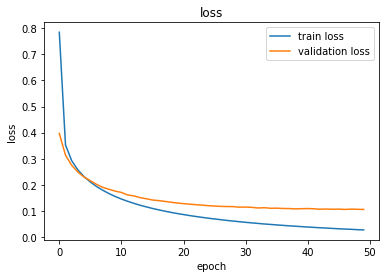

In [23]:
 plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best') # 범례를 최적의 위치에 알아서 위치시켜줌
plt.show()

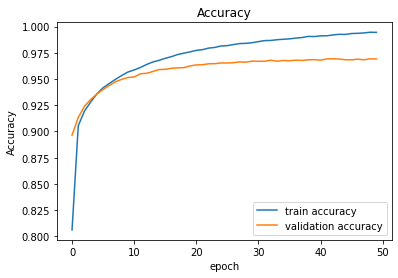

In [24]:
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best') # 범례를 최적의 위치에 알아서 위치시켜줌
plt.show()

[[ 962    0    1    2    1    2    8    1    2    1]
 [   0 1126    4    0    0    1    2    0    2    0]
 [   4    4  996    4    3    0    3    6   12    0]
 [   0    1    4  988    0    6    0    4    5    2]
 [   1    0    5    0  954    0    5    3    2   12]
 [   2    0    0   11    1  859    7    4    5    3]
 [   4    3    2    1    4    4  938    0    2    0]
 [   1    4    8    8    3    1    1  993    1    8]
 [   4    0    5   13    4    3    1    4  937    3]
 [   2    5    1    9   12    5    1    6    2  966]]


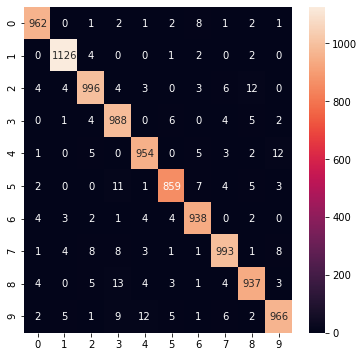

In [28]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

plt.figure(figsize=(6,6))
cm = confusion_matrix(np.argmax(t_test, axis=-1),
                     np.argmax(predictions, axis= -1))
print(cm)
print('='*50)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()